# Exercise 3

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from src.my_random.gen import *
from src.my_random.tests import chi2, kolmogorov, emperical_dist
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pandas as pd

## Exponential Distribution

79.10421538962612

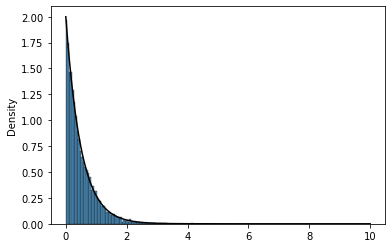

In [86]:
lmbda = 2
exps = exponential(lmbda, 10_000)
h = sns.histplot(exps, stat='density')
x = np.linspace(0, 10, 1000)
sns.lineplot(x=x, y=stats.expon.pdf(x, scale=1/lmbda), color='k')
kolmogorov(exps, stats.expon())

## Normal Distribution

[(-10.0, 10.0)]

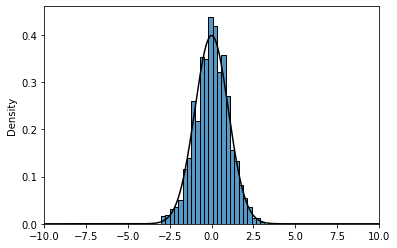

In [90]:
norms = norm_box_mueller(1000)
h = sns.histplot(norms, stat='density')
x=np.linspace(-10,10,1000)
sns.lineplot(x=x, y=stats.norm.pdf(x), color='k')
h.set(xlim=(-10, 10))


(-62.65744413894945, -1.9736956037033961)

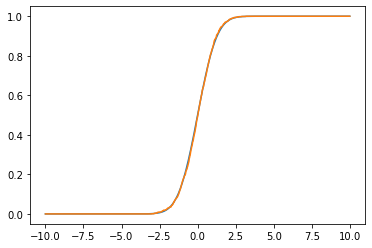

In [93]:

sns.lineplot(x=x, y=stats.norm.cdf(x))
sns.lineplot(x=x, y=[emperical_dist(i, norms) for i in x])
kolmogorov(norms, stats.norm(), (-10, 10))

## Pareto

6.842882392759879

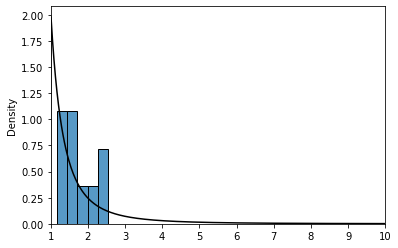

In [79]:
paretos = pareto(2.05, 1, 10)
h = sns.histplot(paretos, stat='density')
x=np.linspace(-10,10,1000)
sns.lineplot(x=x, y=stats.pareto.pdf(x, b=2.05, scale=1), color='k')
h.set(xlim=(1, 10))
kolmogorov(paretos, dist=stats.pareto(b=1, scale=2.05), range=(1,1e4))


<AxesSubplot:>

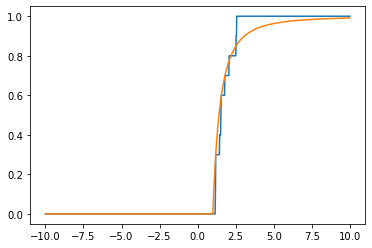

In [80]:

sns.lineplot(x = x, y = [emperical_dist(i, paretos) for i in x] )
sns.lineplot(x=x, y=stats.pareto(b=2.05, scale=1).cdf(x))

In [4]:
ks = [2.05, 2.5, 3, 4]
df = pd.DataFrame({k: pareto(k, 1, 10) for k in ks})

In [5]:
obs_stats =  df.aggregate(['mean', 'var'])

In [7]:
def mean_pareto(beta, k):
    return beta*k/(k-1)

def var_pareto(beta, k):
    return beta**2*k/((k-1)**2 * (k-2))


true_means = [mean_pareto(1, i) for i in ks]
true_vars = [var_pareto(1, i) for i in ks]
true_stats = pd.DataFrame({'mean': true_means, 'var': true_vars})
true_stats.T

,0,1,2,3
mean,1.952381,1.666667,1.50,1.333333
var,37.188209,2.222222,0.75,0.222222


In [8]:
obs_stats

,2.05,2.50,3.00,4.00
mean,1.797133,1.764837,1.329337,1.285407
var,0.815427,1.253118,0.426290,0.073788


Comparing the means and vars, we see that the estimates are are more off the smaller k are. Furthermore, we notice that the estimates of the means are way better than the variance estimates. 

In [53]:
norms = np.stack([norm_box_mueller(10) for _ in range(100)])
t = np.array(stats.t.interval(.95, 9))
t_confs = np.stack([t*(row.std()/np.sqrt(10)) + row.mean() for row in norms])

chi = np.array(stats.chi2.interval(.95, 9))
chi_confs = np.stack([9*row.var() / chi[::-1] for row in norms])

conf = norms.mean(axis=1) + np.array([-1.96*norms.std(axis=1), 1.96*norms.std(axis=1)])

mean_df = pd.DataFrame({'lwr': t_confs[:,0], 'mean':norms.mean(1), 'upr':t_confs[:,1]})
var_df = pd.DataFrame({'lwr': chi_confs[:,0], 'var':norms.var(1), 'upr':chi_confs[:,1]})


In [54]:
mean_df.describe()

,lwr,mean,upr
count,100.000000,100.000000,100.000000
mean,-0.688873,-0.011229,0.666416
std,0.311284,0.261927,0.286284
min,-1.368979,-0.804567,-0.250260
25%,-0.925813,-0.183167,0.469010
50%,-0.687262,-0.048167,0.658813
75%,-0.493565,0.198056,0.850182
max,0.119087,0.665376,1.401509


In [55]:
var_df.describe()

,lwr,var,upr
count,100.000000,100.000000,100.000000
mean,0.443607,0.937625,3.124967
std,0.187871,0.397091,1.323446
min,0.120146,0.253945,0.846361
25%,0.328122,0.693532,2.311441
50%,0.407786,0.861913,2.872629
75%,0.551490,1.165652,3.884945
max,1.201059,2.538607,8.460802


We see that the confidence intervals vary quite a lot both for the mean and the variance. In the extreme case of the mean, 0 is not even in the confidence interval, which in a lot of experiments would mean we would have concluded a statistical signficant result, even though this is gaussian noise.\
The variance has non-symmetrical confidence intervals. We see that especially the upper bound of the variance has a high standard deviation. This is to be expected, since we only have 10 observations